# Cuadraturas

In [84]:
%load_ext autoreload
%autoreload 2

In [85]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../../tools/interpolacion')

from interp_tools import interp_lagrange

In [86]:
from interp_tools import interp_lagrange
from scipy.interpolate import interp1d

Ejemplo: función
$$
f(x) = sin(3x) + x^2
$$

El resultado de la integral es:

$$
\int_1^3 f(x)dx = 1/3 (cos(3)-cos(9)+26)
$$

In [87]:
I_analitico = ((np.cos(3) - np.cos(9)) + 26)/3
print(I_analitico)

8.640379255094745


In [167]:
def f(x):
    return np.sin(3*x) + x**2

Tomar una muestra de tamaño Npoints:

In [89]:
Npoints = 4
xd = np.linspace(1, 3, Npoints)
yd = f(xd)

In [90]:
# elegir una partición más densa para graficar
N = 1000
t = np.linspace(xd.min(), xd.max(), N)
y0 = np.repeat(0, N)

Text(0, 0.5, 'f(x)')

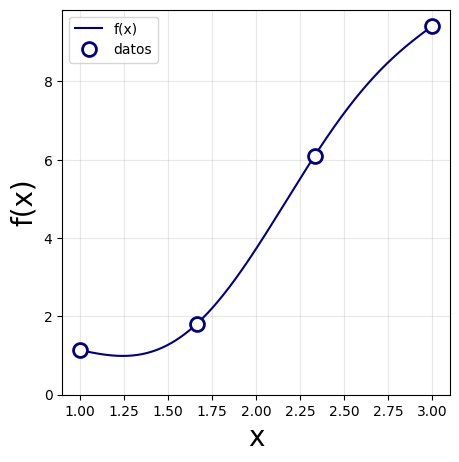

In [91]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

ax.plot(t, f(t), color='navy', linestyle='-', label='f(x)')
ax.plot(xd, yd, 'o', mfc='white', mec='navy', markersize=10, mew=2, label='datos')
ax.set_ylim(bottom=0)
ax.grid(alpha=0.3)
ax.legend()
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)

Text(0.5, 1.0, 'Integral de la función')

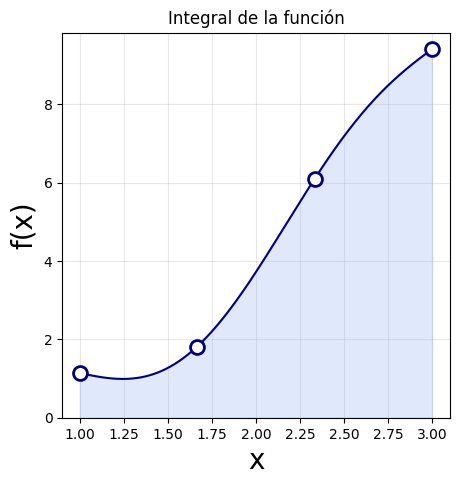

In [92]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

ax.plot(t, f(t), color='navy', linestyle='-')
ax.plot(xd, yd, 'o', mfc='white', mec='navy', markersize=10, mew=2)
ax.set_ylim(bottom=0)
ax.grid(alpha=0.3)
ax.fill_between(t, y0, f(t), color='cornflowerblue', alpha=0.2)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.set_title('Integral de la función')

## Aproximaciones de la función

In [93]:
# Parecido a la regla del punto medio

f1 = interp1d(xd, yd, kind='nearest')
f2 = interp1d(xd, yd, kind='previous')
f3 = interp1d(xd, yd, kind='next')

In [94]:
# Splines

f4 = interp1d(xd, yd)  # <--- linear (default)
f5 = interp1d(xd, yd, kind='quadratic')
f6 = interp1d(xd, yd, kind='cubic')

In [95]:
# Usando el polinomio interpolante

interp_lagrange??

Signature: interp_lagrange(x, xd, yd)
Docstring: <no docstring>
Source:   
def interp_lagrange(x, xd, yd):
    y = 0
    for k in range(len(yd)):
        y = y + yd[k]*Lk(xd, x, k)
    return y
File:      ~/store/TeachJob/ComputacionProf/computacion_Famaf/tools/interpolacion/interp_tools.py
Type:      function

In [96]:
from functools import partial
f7 = partial(interp_lagrange, xd=xd, yd=yd)

Veamos gráficamente cómo son las aproximaciones

In [97]:
# Color schemes
c1 = '#A07855FF'
c2 = '#D4B996FF'
ce1 = 'k'
ce2 = 'peru'

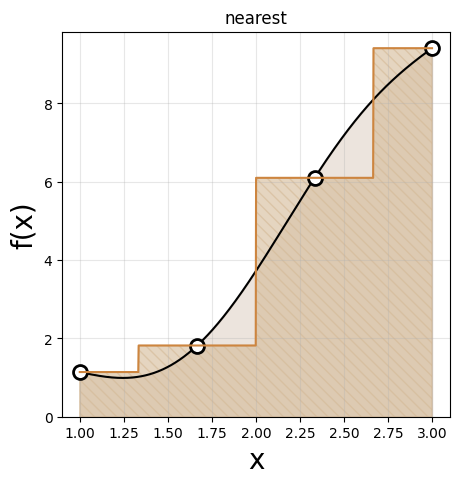

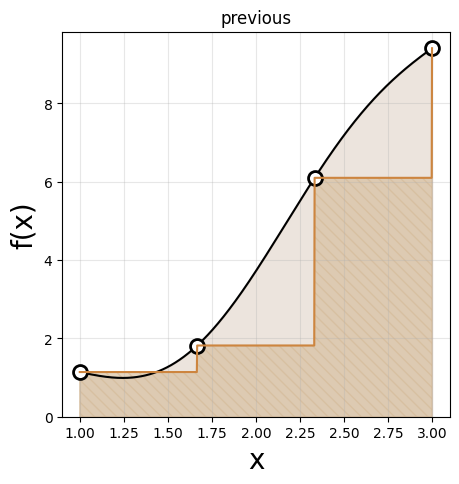

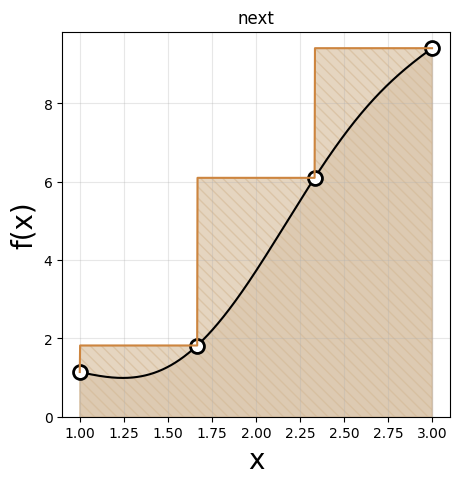

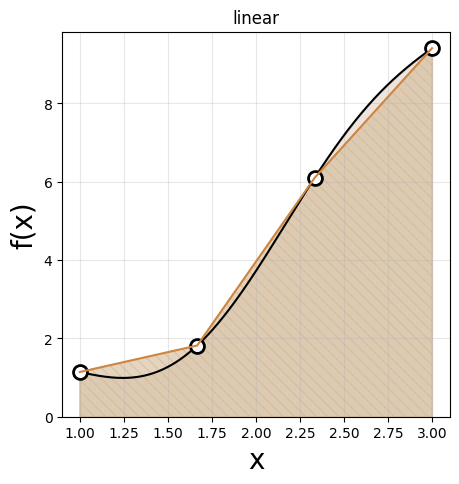

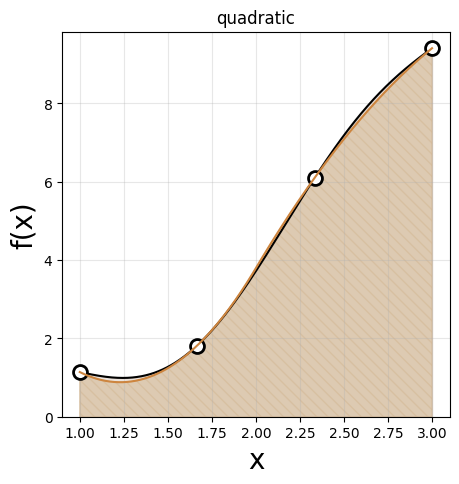

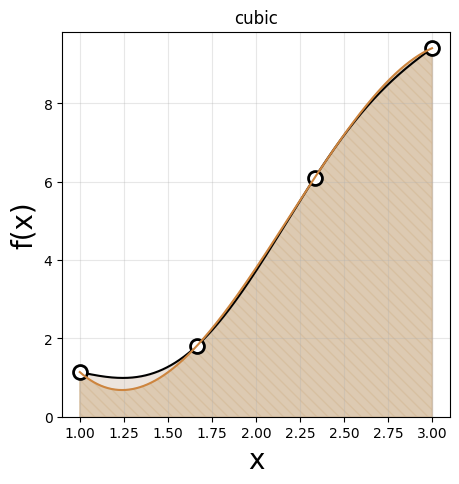

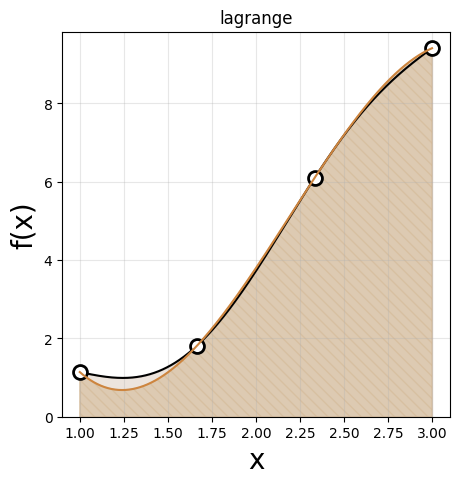

In [98]:
names = ['nearest', 'previous', 'next', 'linear', 'quadratic', 'cubic', 'lagrange']
functions = [f1, f2, f3, f4, f5, f6, f7]
for name, func in zip(names, functions):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()

    ax.plot(t, f(t), color='k', linestyle='-')
    ax.plot(xd, yd, 'o', mfc='white', mec='k', markersize=10, mew=2)
    ax.set_ylim(bottom=0)
    ax.grid(alpha=0.3)
    ax.fill_between(t, y0, f(t), color=c1, alpha=0.2)

    ax.plot(t, func(t), color=ce2)
    ax.fill_between(t, y0, func(t), hatch='\\\\\\', color=c2, alpha=0.6)

    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('f(x)', fontsize=20)
    ax.set_title(name)

Veamos con más puntos

In [99]:
Npoints = 12
xd = np.linspace(1, 3, Npoints)
yd = f(xd)

In [100]:
f1 = interp1d(xd, yd, kind='nearest')
f2 = interp1d(xd, yd, kind='previous')
f3 = interp1d(xd, yd, kind='next')
f4 = interp1d(xd, yd)  # <--- linear (default)
f5 = interp1d(xd, yd, kind='quadratic')
f6 = interp1d(xd, yd, kind='cubic')
f7 = partial(interp_lagrange, xd=xd, yd=yd)

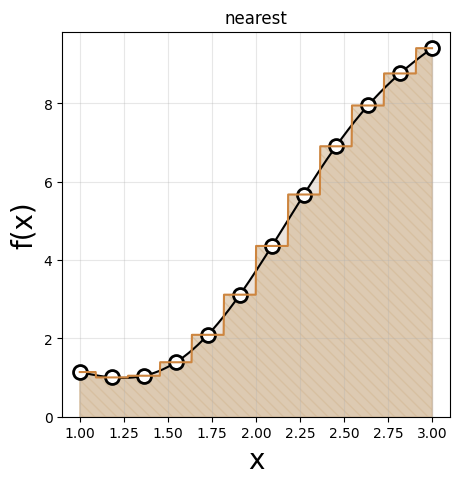

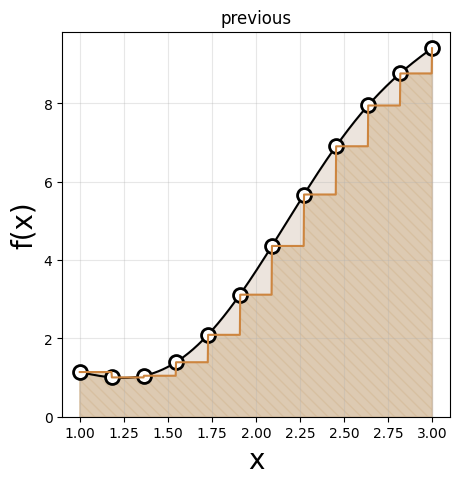

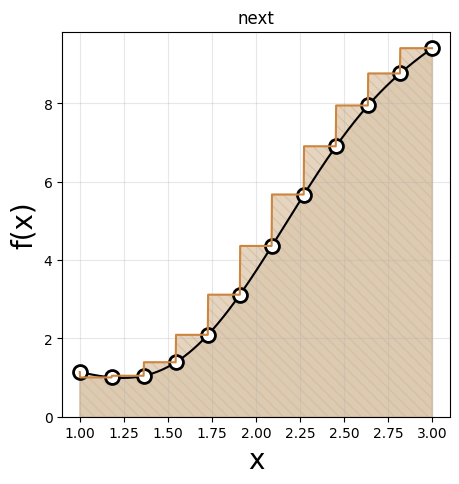

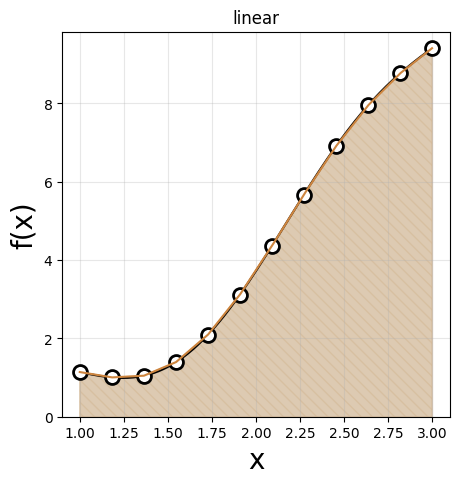

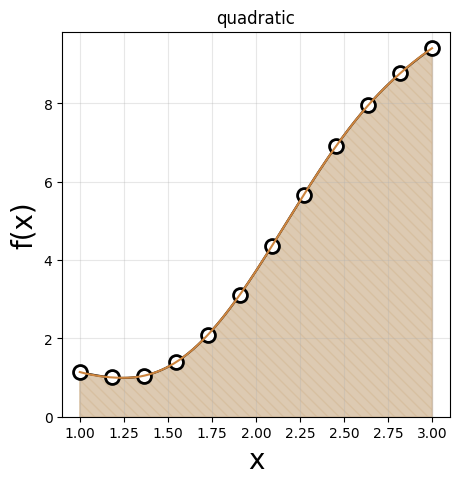

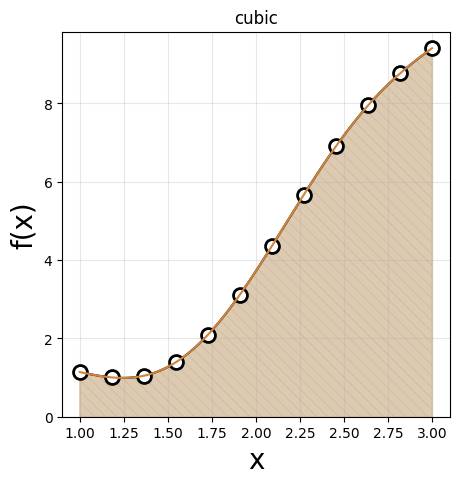

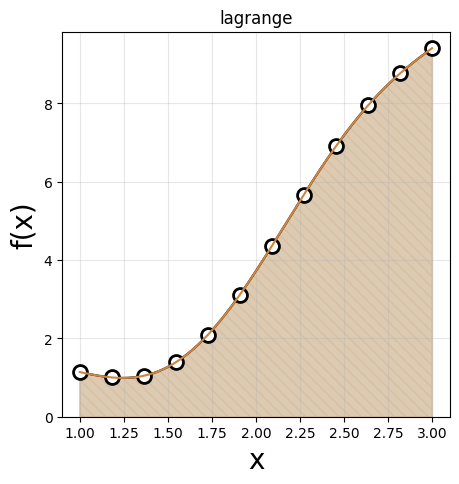

In [101]:
names = ['nearest', 'previous', 'next', 'linear', 'quadratic', 'cubic', 'lagrange']
functions = [f1, f2, f3, f4, f5, f6, f7]
for name, func in zip(names, functions):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()

    ax.plot(t, f(t), color='k', linestyle='-')
    ax.plot(xd, yd, 'o', mfc='white', mec='k', markersize=10, mew=2)
    ax.set_ylim(bottom=0)
    ax.grid(alpha=0.3)
    ax.fill_between(t, y0, f(t), color=c1, alpha=0.2)

    ax.plot(t, func(t), color=ce2)
    ax.fill_between(t, y0, func(t), hatch='\\\\\\', color=c2, alpha=0.6)

    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('f(x)', fontsize=20)
    ax.set_title(name)

En el modulo tenemos dos implementaciones de Simpson compuesta:
- una que toma los datos y la funcion
- una que toma la funcion, el intervalo y el error

In [168]:
from cuadraturas import cuad_simpson_compuesta, cuad_simpson_compuesta_II

In [169]:
A = cuad_simpson_compuesta(x=xd, f=f)
print(f'{I_analitico}\n{A}\n')

8.640379255094745
8.596960263740572



In [171]:
A = cuad_simpson_compuesta_II(f=f, I=(1, 3), eps=0.01)
print(f'{I_analitico}\n{A}\n')

8.640379255094745
8.527511804618067



Veamos como evoluciona el error con la cantidad de puntos

In [172]:
Areas = []
Npoints = range(3, 200)
for npoints in Npoints:
    xd = np.linspace(1, 3, npoints)
    A = cuad_simpson_compuesta(x=xd, f=f)
    Areas.append(A)

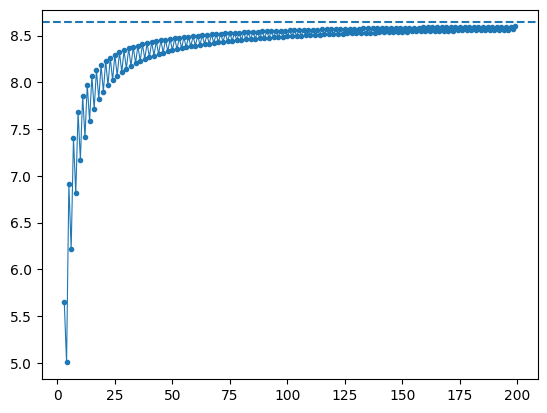

In [173]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Npoints, Areas, s=9)
ax.plot(Npoints, Areas, linewidth=0.8)
ax.axhline(I_analitico, linestyle='--')

Veamos como evoluciona el error con la tolerancia

In [174]:
Areas = []
EPS = np.logspace(-1, -5, 20)

In [175]:
EPS

array([1.00000000e-01, 6.15848211e-02, 3.79269019e-02, 2.33572147e-02,
       1.43844989e-02, 8.85866790e-03, 5.45559478e-03, 3.35981829e-03,
       2.06913808e-03, 1.27427499e-03, 7.84759970e-04, 4.83293024e-04,
       2.97635144e-04, 1.83298071e-04, 1.12883789e-04, 6.95192796e-05,
       4.28133240e-05, 2.63665090e-05, 1.62377674e-05, 1.00000000e-05])

In [176]:
for eps in EPS:
    xd = np.linspace(1, 3, npoints)
    A = cuad_simpson_compuesta_II(f=f, I=(1, 3), eps=eps)
    Areas.append(A)

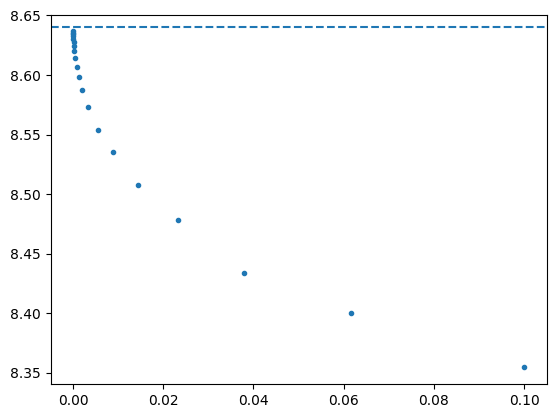

In [177]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(EPS, Areas, s=9)
#ax.plot(Npoints, Areas, linewidth=0.8)
ax.axhline(I_analitico, linestyle='--')

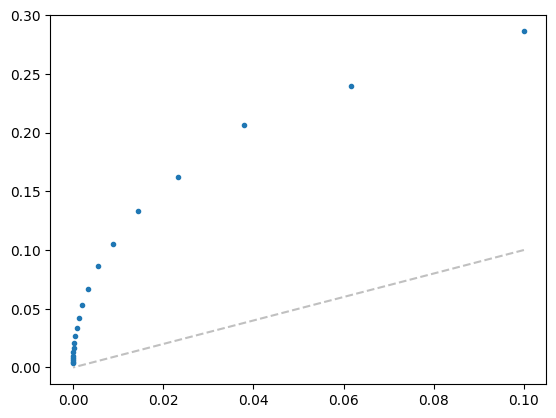

In [178]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(EPS, I_analitico-Areas, s=9)
ax.plot(EPS, EPS, linestyle='--', color='silver')